In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pyiron
import pyiron_contrib

In [4]:
import ase.db

In [5]:
from pyiron import Project, ase_to_pyiron

In [6]:
from pyiron_contrib.atomistic.atomicrex.atomicrex_job import Atomicrex

In [7]:
pr = pyiron.Project("import_database")

Copy "Cu_training_archive.tar.gz" and "export.csv" into the same folder as this notebook.

In [8]:
if len(pr.job_table()) == 0:
    pr.unpack("Cu_training_archive")

In [9]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,None,df1_A1_A2_A3_EV_elast_phon,/df1_A1_A2_A3_EV_elast_phon,/home/jovyan/,import_database/Cu_database/,2021-02-08 10:33:52.341472,None,None,zora@cmti001#1,GenericJob,0.4,None,None
1,2,finished,None,df3_10k,/df3_10k,/home/jovyan/,import_database/Cu_database/,2021-02-08 10:33:53.993230,None,None,zora@cmti001#1,GenericJob,0.4,None,None
2,3,finished,None,df2_1k,/df2_1k,/home/jovyan/,import_database/Cu_database/,2021-02-08 10:33:54.435308,None,None,zora@cmti001#1,GenericJob,0.4,None,None


In [10]:
j = pr.load('df2_1k')

In [11]:
j.to_pandas()

,name,atoms,energy,forces,number_of_atoms
0,A1:FHI-aims/PBE/tight:elastic:s_e_0,"(Atom('Cu', [0.0, 0.0, 0.0], index=0))",-3.699843,"[[0.0, 0.0, 0.0]]",1.0
1,A1:FHI-aims/PBE/tight:murnaghan:strain_1_0,"(Atom('Cu', [0.0, 0.0, 0.0], index=0))",-3.699841,"[[0.0, 0.0, 0.0]]",1.0
2,A1:FHI-aims/PBE/tight:phonon:supercell_phonon_0,"(Atom('Cu', [4.3368086899420173e-19, 0.007070999999999999, 0.007070999999999999], index=0), Atom('Cu', [3.3306690738754696e-16, 1.81563, 1.8156300000000005], index=1), Atom('Cu', [7.262518, 10.893...",-236.789603,"[[-1.13852957740976e-06, -0.0464638907314277, -0.0464636807741622], [-3.86335457040412e-06, 0.0124851330231607, 0.0124792943417333], [-1.94300535086066e-06, 6.63943441884098e-05, 6.92790474109119e...",64.0
3,A1:FHI-aims/PBE/tight:murnaghan:strain_1_02,"(Atom('Cu', [0.0, 0.0, 0.0], index=0))",-3.697932,"[[0.0, 0.0, 0.0]]",1.0
4,A1:FHI-aims/PBE/tight:qha:phonopy_strain_1_02:supercell_phonon_0,"(Atom('Cu', [0.0, 0.007070999999999999, 0.007070999999999999], index=0), Atom('Cu', [0.0, 1.8274, 1.8274], index=1), Atom('Cu', [0.0, 3.6548, 3.6548], index=2), Atom('Cu', [0.0, 5.4822, 5.4822], i...",-236.667372,"[[-1.7950713845026e-06, -0.0426786586259085, -0.0426788121078561], [-2.57716410004614e-06, 0.0113518460490296, 0.0113462949227562], [-1.91163426088073e-06, -1.1293195658261e-05, -8.93773164041937e...",64.0
...,...,...,...,...,...
995,Zr4Al3,"(Atom('Cu', [1.397, 0.806558, 0.0], index=0), Atom('Cu', [2.794, 3.226233, 0.0], index=1), Atom('Cu', [4.191, 0.806558, 0.0], index=2), Atom('Cu', [5.588, 3.226233, 1.397], index=3), Atom('Cu', [5...",-18.922813,"[[-6.18422096975777e-08, 3.90650715661433e-08, 1.47017995734897e-07], [-1.08141460161261e-07, 1.42848306798042e-09, 1.33208449421711e-07], [1.74453858220392e-07, -6.50627272334328e-08, 1.766242321...",7.0
996,fcc_100surf_X110_Y-110_Z001_4at_d0.95,"(Atom('Cu', [0.0, 0.0, 0.0], index=0), Atom('Cu', [1.143, 1.143, 1.616446], index=1), Atom('Cu', [0.0, 0.0, 3.232892], index=2), Atom('Cu', [1.143, 1.143, 4.849338], index=3))",-10.811770,"[[-4.30878346990838e-07, -7.31495829958533e-08, 1.1652658274842], [9.19146530636258e-08, 7.3437277471036e-08, 0.0281190915073972], [5.69276808194065e-08, 6.81020524394929e-08, -0.0281191395865017]...",4.0
997,ran2.7197,"(Atom('Cu', [0.0, 0.0, 0.0], index=0), Atom('Cu', [-0.8247519999999999, 8.539541, 5.284737], index=1))",-5.405739,"[[-0.233777024216308, -0.488775610406501, 0.451270562003092], [0.233777024216308, 0.488775610406501, -0.451270562003092]]",2.0
998,A15.shakesmallsuper2.14,"(Atom('Cu', [19.532944999999994, -0.449866, 19.143791], index=0), Atom('Cu', [2.437943, 2.3453879999999994, 2.4400769999999996], index=1), Atom('Cu', [1.263128, 2.228245, 19.507035000000002], inde...",-172.952480,"[[0.872967501214253, 0.798687481685555, 0.836501539528011], [-0.0180451951711004, 0.0546265390221465, -0.141831248405681], [-0.4156252456994, -0.0331529380226789, 1.09332664207543], [0.45544831009...",64.0


In [12]:
type(j.to_pandas()["atoms"].values[0])

ase.atoms.Atoms

In [13]:
pr = Project("CuFit_TestHDF")
job = pr.create_job(Atomicrex, "CuEAM_testOut2", delete_existing_job=True)

In [14]:
df_import = j.to_pandas()

In [15]:
for n, structure, e, f in zip(df_import.name.values, df_import.atoms.values, df_import.energy.values, df_import.forces.values):
    struct = ase_to_pyiron(structure)
    s = job.structures.add_structure(struct, "s" + n.replace(".", "").replace(":", "").replace("-", "").replace("/", ""))
    s.fit_properties.add_FitProperty("atomic-energy", target_value=e/len(structure))
    s.fit_properties.add_FitProperty("atomic-forces", target_value=f)

In [16]:
job.potential = job.factories.potentials.eam_potential()

In [17]:
rho = job.factories.functions.spline(identifier="CuCu_rho", cutoff=7, derivative_left=-25)
rho.parameters.add_node(x=0.5, start_val=10, enabled=False)
rho.parameters.add_node(x=1.0, start_val=3, enabled=True, min_val=1, max_val=3)
rho.parameters.add_node(x=2.0, start_val=0.7, enabled=True, min_val=0.0, max_val=1)
rho.parameters.add_node(x=3.0, start_val=0.35, enabled=True, min_val=0.0, max_val=0.8)
rho.parameters.add_node(x=4.0, start_val=0.2, enabled=True, min_val=0.0, max_val=0.6)
rho.parameters.add_node(x=5.0, start_val=0.1, enabled=True, min_val=0.0, max_val=0.4)
rho.parameters.add_node(x=6.0, start_val=0.05, enabled=True, min_val=0.0, max_val=0.2)
rho.parameters.add_node(x=7.0, start_val=0.0, enabled=False)

In [18]:
V =  job.factories.functions.morse_B(identifier="V_CuCu", D0=1.0, r0=1.8, beta=2, S=2, delta=0)
V.screening = job.factories.functions.exp_B_screening(identifier="V_screen", cutoff=7, rc=1, alpha=0.2, exponent=1)
V.parameters.D0.min_val = 0
V.parameters.D0.max_val = 3.5
V.parameters.r0.min_val = 1.65
V.parameters.r0.max_val = 1.95
V.parameters.beta.min_val = 0.5
V.parameters.beta.max_val = 4
V.parameters.S.min_val = 1.01
V.parameters.S.max_val = 10
V.parameters.delta.min_val = -1
V.parameters.delta.max_val = 1

In [19]:
F = job.factories.functions.spline(identifier="F_CuCu", cutoff=100)
F.parameters.add_node(x=0.0, start_val=0, enabled=False)
F.parameters.add_node(x=5.0, start_val=-1, enabled=True, min_val=-3.5, max_val=0)
F.parameters.add_node(x=10, start_val=-1, enabled=True, min_val=-3.5, max_val=0)
F.parameters.add_node(x=15, start_val=-1.6, enabled=True, min_val=-3.5, max_val=0)
F.parameters.add_node(x=20, start_val=-1, enabled=True, min_val=-3.5, max_val=0)
F.parameters.add_node(x=25, start_val=0.0, enabled=True, min_val=-3.5, max_val=3.5)
F.parameters.add_node(x=30, start_val=2.0, enabled=True, min_val=-1, max_val=5)
F.parameters.add_node(x=40, start_val=5.0, enabled=True, min_val=0, max_val=7)

In [20]:
job.potential.electron_densities[rho.identifier] = rho
job.potential.pair_interactions[V.identifier] = V
job.potential.embedding_energies[F.identifier] = F
job.input.atom_types = {"Cu": None}
#job.potential.export_file = F
job.input.output_interval = 100000

In [21]:
job.input.fit_algorithm = job.factories.algorithms.ar_lbfgs(max_iter=500)
job.executable.list_executables()

['1.0']

(-3.5, 1.0)

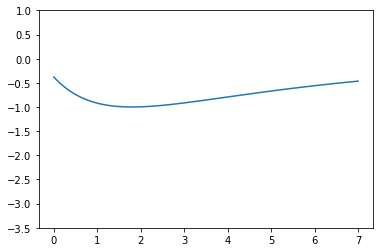

In [22]:
r = np.linspace(0, 7, 304)

D0=1
r0=1.8
beta=0.3
S=5
delta=0
morse = lambda r: (D0/(S-1))*np.exp(-beta*np.sqrt(2*S)*(r-r0))-(D0*S/(S-1))*np.exp(-beta*np.sqrt(2/S)*(r-r0))

plt.plot(r, morse(r))
plt.ylim(-3.5,1)

In [23]:
job.run()

The job CuEAM_testOut2 was saved and received the ID: 4


In [24]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,4,not_converged,None,CuEAM_testOut2,/CuEAM_testOut2,/home/jovyan/,CuFit_TestHDF/,2021-02-09 14:06:23.894281,2021-02-09 14:08:15.827964,111.0,pyiron@jupyter-jan-2djanssen-2dpyiron-2datomicrex-2dy00hoap7#1,atomicrex,1.0,None,None
